# Time Series Classification Part 2

In this notebook, we will try to forecast the 100 next values of the "6" variable for ETTh2 dataset.


To achieve this, we will train a predictor to accurately predict the next 100 values.

## Preprocessing of data

First, we will begin by looking at which values are most correlated with our sought-after data.

To accomplish this, we will create points on a graph where one set of points represents our data with value 6 and the other set represents the remaining values. By doing so, we aim to identify the most correlated values visually.

We just need to identify the data with which the points on the graph exhibit a linear trend.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

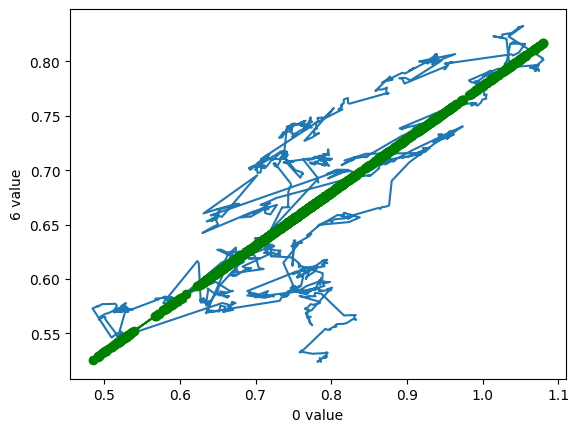

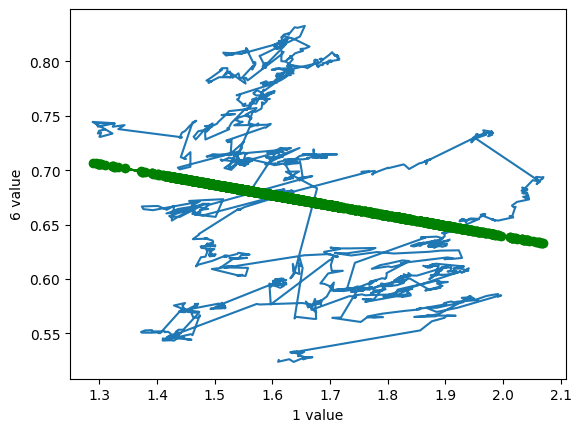

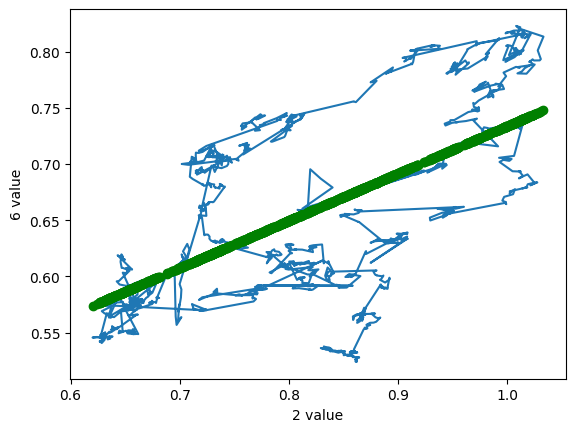

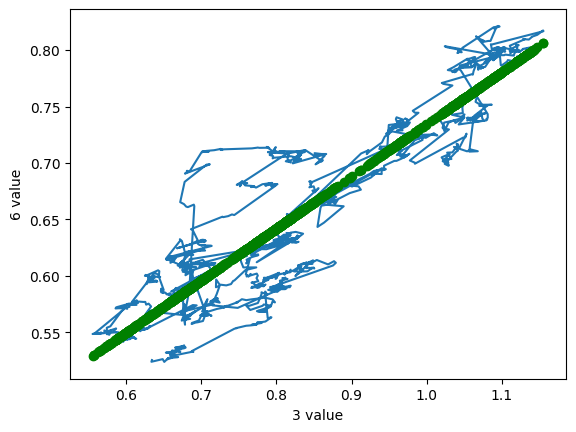

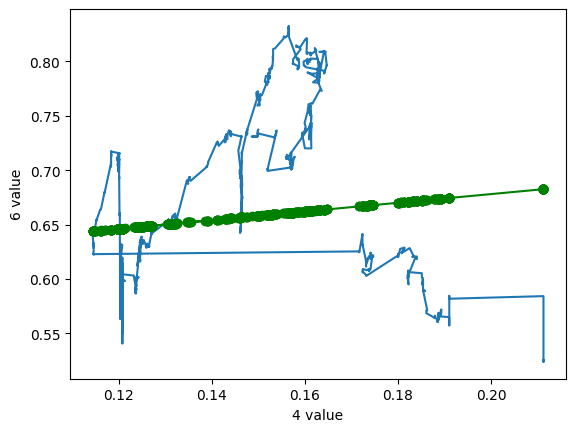

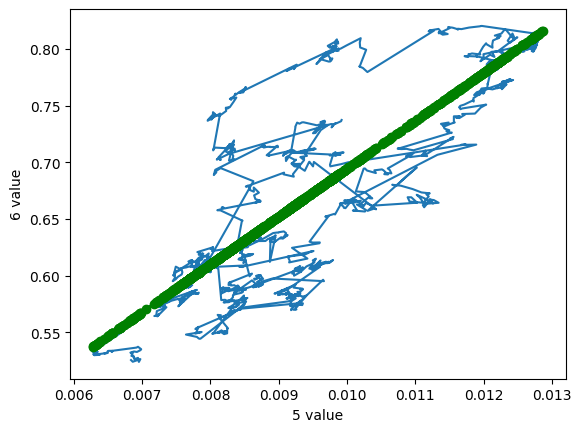

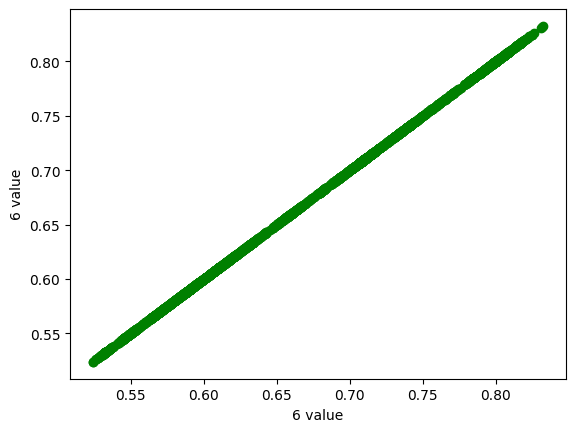

[0.595, 0.597, 0.602, 0.5983, 0.6003, 0.5998, 0.601, 0.5936, 0.5915, 0.593, 0.5805, 0.5808, 0.5767, 0.5783, 0.579, 0.5778, 0.577, 0.579, 0.5782, 0.578, 0.5784, 0.5783, 0.5817, 0.5755, 0.5735, 0.5748, 0.5685, 0.5708, 0.5727, 0.5726, 0.5726, 0.5747, 0.5823, 0.595, 0.5937, 0.618, 0.6173, 0.619, 0.6197, 0.622, 0.6258, 0.6308, 0.6295, 0.628, 0.6313, 0.6303, 0.6132, 0.6153, 0.6165, 0.624, 0.6255, 0.6233, 0.6202, 0.6185, 0.6215, 0.624, 0.6275, 0.623, 0.6105, 0.6125, 0.61, 0.6095, 0.609, 0.6008, 0.6025, 0.6043, 0.6005, 0.6011, 0.596, 0.5985, 0.5913, 0.5872, 0.5997, 0.59, 0.586, 0.5855, 0.586, 0.585, 0.5855, 0.5865, 0.5918, 0.5935, 0.5911, 0.594, 0.5972, 0.5943, 0.5947, 0.596, 0.596, 0.5968, 0.5966, 0.5975, 0.6002, 0.5995, 0.5987, 0.5997, 0.6002, 0.6032, 0.6071, 0.5909, 0.5885, 0.5841, 0.5885, 0.5843, 0.5843, 0.585, 0.5847, 0.588, 0.5853, 0.5848, 0.5875, 0.5627, 0.573, 0.5741, 0.575, 0.5744, 0.5723, 0.5745, 0.5798, 0.5814, 0.5825, 0.5822, 0.582, 0.5843, 0.5863, 0.587, 0.5839, 0.5843, 0.5845, 0.

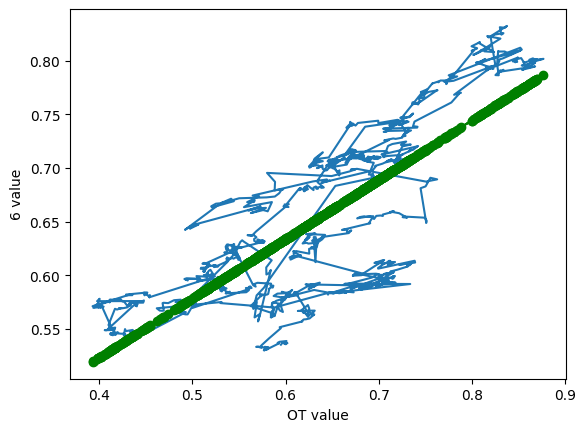

In [2]:
# Loading the ETTh1 dataset
from sklearn.linear_model import LinearRegression
print("ok")

df = pd.read_csv("exchange_rate_with_missing.csv")

def Compare(df,test):
        for v in range(7):
            df_temp=[]
            df_6temp=[]
            liste_6=[]
            for i in range(len(df["0"])) :
                if not(pd.isna(df[f"{v}"][i])) and not(pd.isna(df[test][i])):
                        df_temp.append(df[f"{v}"][i])
                        df_6temp.append(df[test][i])
            
            
            model = LinearRegression()
            model.fit(np.array(df_temp).reshape(-1, 1), np.array(df_6temp).reshape(-1, 1))
            plt.plot(df_temp,df_6temp)
            for i in range(len(df_temp)):
                liste_6.append(model.predict(np.array(df_temp[i]).reshape(-1, 1))[0])
            plt.plot(df_temp, liste_6, 'o-', label='Données réelles',color="g")
            plt.xlabel(f'{v} value')
            plt.ylabel(test+' value')
            plt.show()
        for v in ["OT"]:
            df_temp=[]
            df_6temp=[]
            liste_6=[]
            for i in range(len(df["0"])) :
                if not(pd.isna(df[f"{v}"][i])) and not(pd.isna(df[test][i])):
                        df_temp.append(df[f"{v}"][i])
                        df_6temp.append(df[test][i])
            
            print(df_temp)
            model = LinearRegression()
            model.fit(np.array(df_temp).reshape(-1, 1), np.array(df_6temp).reshape(-1, 1))
            plt.plot(df_temp,df_6temp)
            for i in range(len(df_temp)):
                liste_6.append(model.predict(np.array(df_temp[i]).reshape(-1, 1))[0])
            plt.plot(df_temp, liste_6, 'o-', label='Données réelles',color="g")
            plt.xlabel(f'{v} value')
            plt.ylabel(test+' value')
            plt.show()
Compare(df,"6")

## Choose of the good value

We have observed that the most correlated value is value 3, so we will use it with linear regression to fill in the missing values. Unfortunately, not everything is complete yet, as there are moments when both columns are empty on the same day. We will repeat the same reasoning until we no longer find a value highly correlated with our value "6" for it to be meaningful.

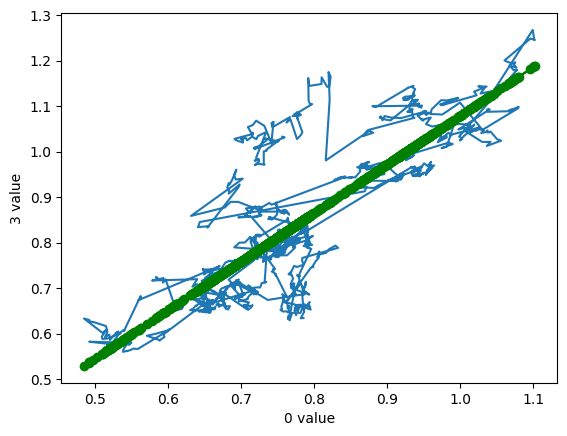

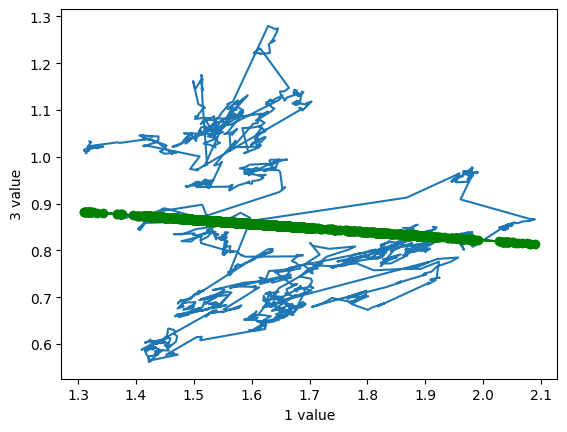

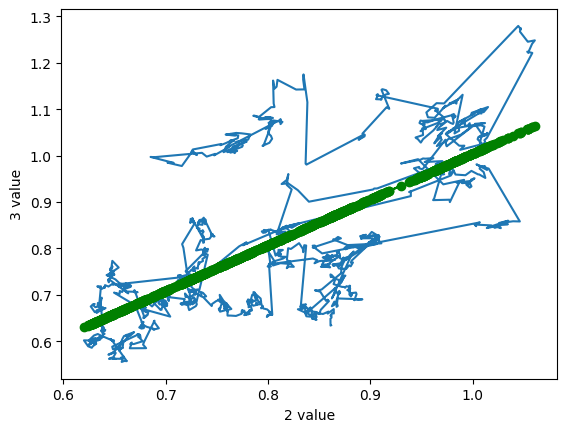

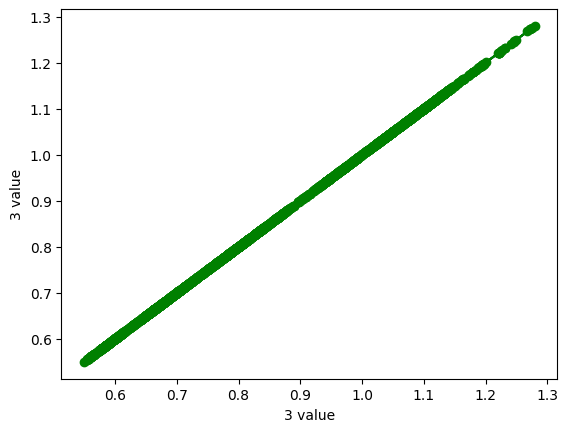

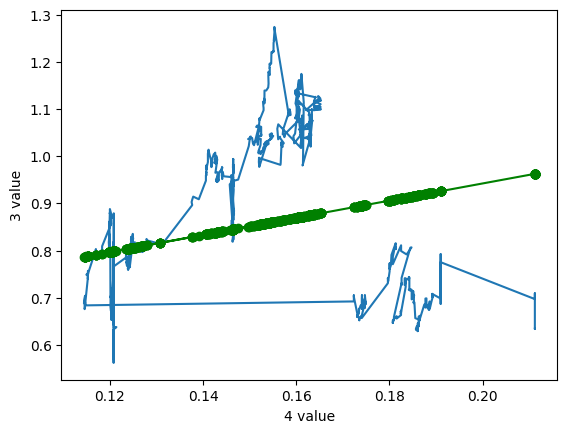

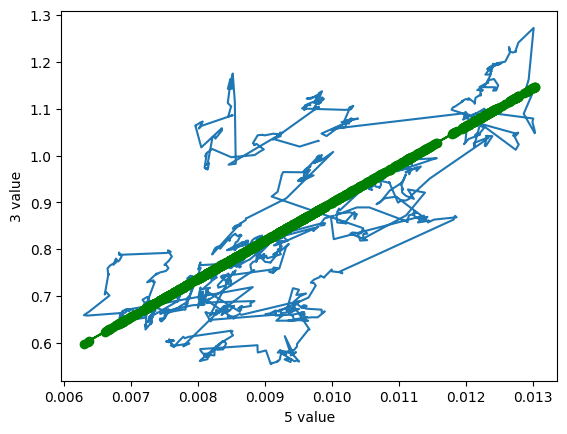

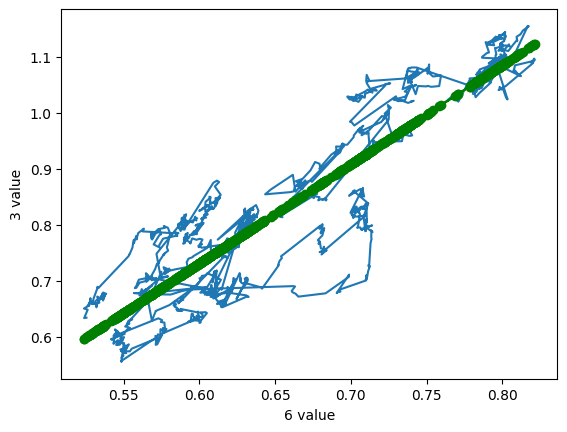

[0.595, 0.597, 0.602, 0.5983, 0.6003, 0.5998, 0.601, 0.5936, 0.5915, 0.593, 0.5808, 0.5767, 0.5783, 0.5735, 0.5748, 0.5685, 0.5708, 0.5735, 0.5737, 0.5739, 0.5733, 0.5741, 0.5757, 0.5768, 0.5752, 0.5768, 0.5776, 0.5819, 0.5828, 0.5812, 0.5785, 0.5783, 0.5875, 0.586, 0.5852, 0.5873, 0.618, 0.6173, 0.619, 0.6197, 0.622, 0.6258, 0.6308, 0.6295, 0.613, 0.59, 0.586, 0.5855, 0.586, 0.585, 0.5855, 0.5865, 0.5918, 0.5935, 0.5911, 0.5947, 0.596, 0.596, 0.5968, 0.5909, 0.5885, 0.5841, 0.5885, 0.5843, 0.5843, 0.585, 0.5847, 0.588, 0.5853, 0.5848, 0.5875, 0.5881, 0.5896, 0.5912, 0.5902, 0.5773, 0.5754, 0.5627, 0.5645, 0.5648, 0.563, 0.5674, 0.5667, 0.565, 0.5664, 0.571, 0.5712, 0.5711, 0.5708, 0.5711, 0.5717, 0.5738, 0.573, 0.5731, 0.5732, 0.5705, 0.575, 0.5753, 0.5755, 0.5742, 0.5735, 0.573, 0.5413, 0.5377, 0.533, 0.534, 0.5348, 0.5376, 0.5438, 0.5442, 0.544, 0.544, 0.5448, 0.5441, 0.5438, 0.5448, 0.5401, 0.5402, 0.542, 0.5383, 0.5405, 0.5436, 0.5472, 0.5537, 0.545, 0.5465, 0.5465, 0.5431, 0.538,

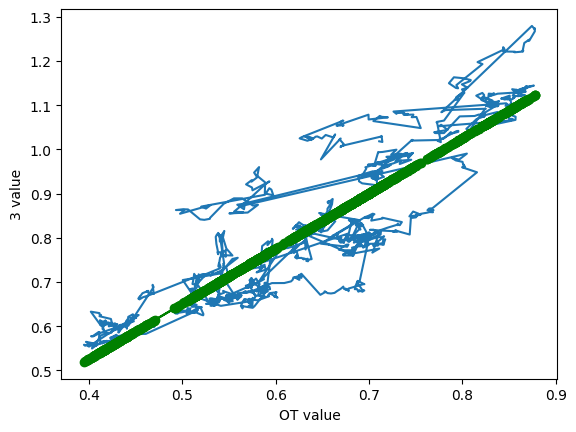

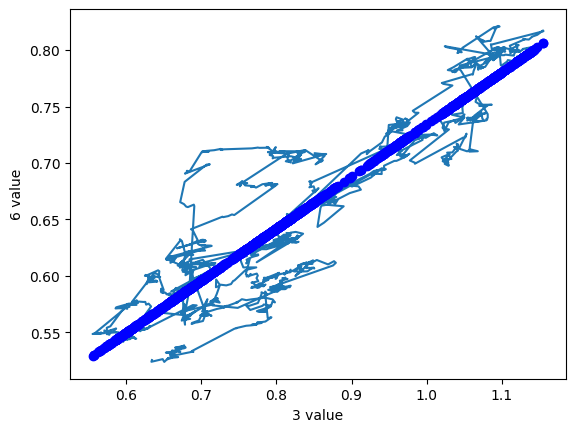

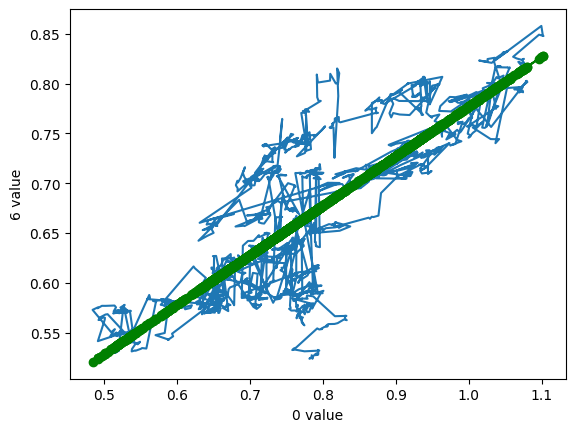

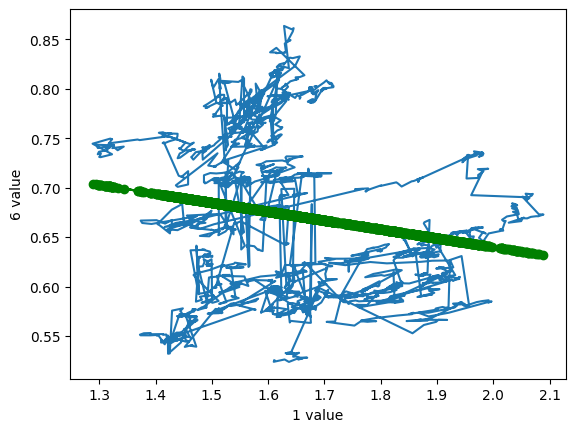

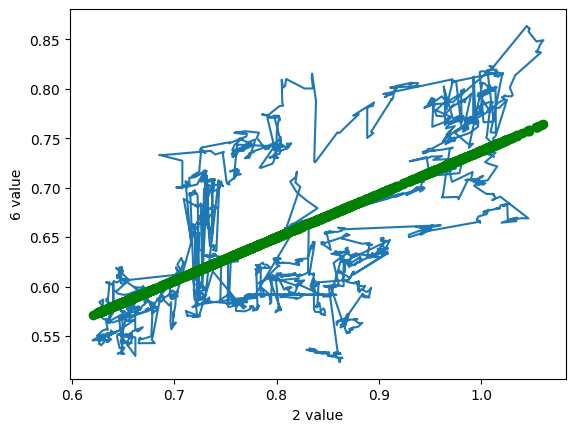

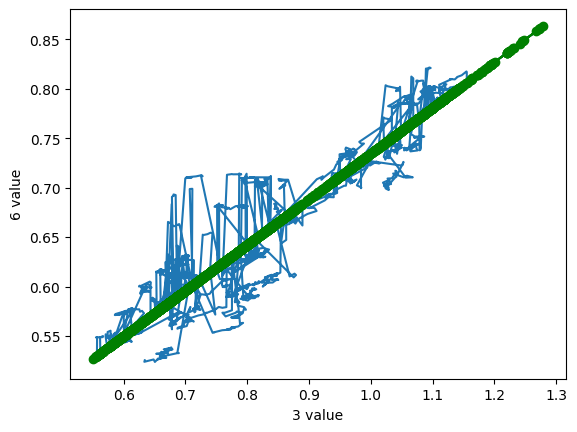

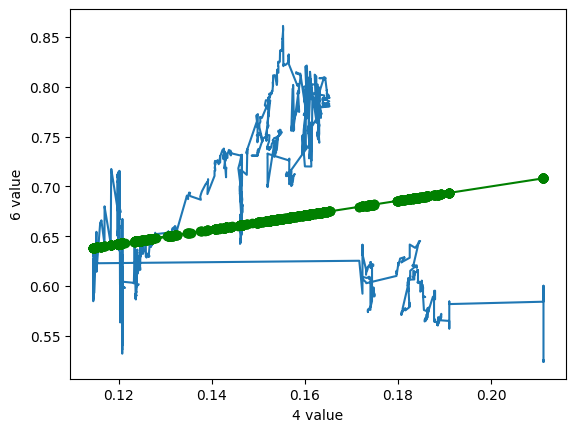

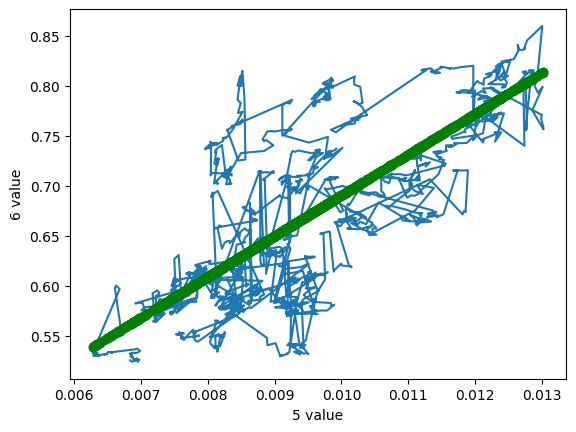

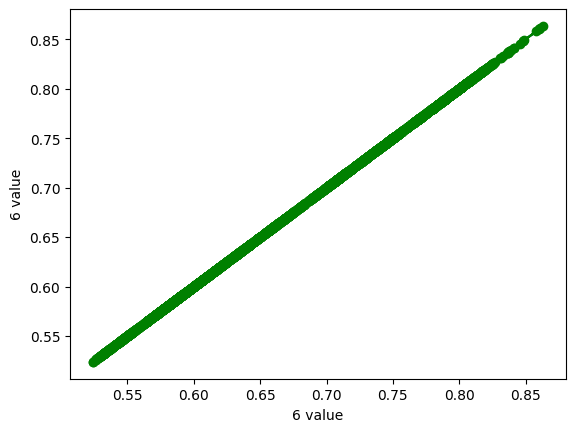

[0.595, 0.597, 0.602, 0.5983, 0.6003, 0.5998, 0.601, 0.5936, 0.5915, 0.593, 0.5805, 0.5808, 0.5767, 0.5783, 0.579, 0.5778, 0.577, 0.579, 0.5782, 0.578, 0.5784, 0.5783, 0.5817, 0.5755, 0.5735, 0.5748, 0.5685, 0.5708, 0.5727, 0.5726, 0.5726, 0.5747, 0.5735, 0.5737, 0.5739, 0.5733, 0.5741, 0.5757, 0.5768, 0.5752, 0.5768, 0.5776, 0.5819, 0.5828, 0.5812, 0.5785, 0.5783, 0.5823, 0.5875, 0.586, 0.5852, 0.5873, 0.595, 0.5937, 0.618, 0.6173, 0.619, 0.6197, 0.622, 0.6258, 0.6308, 0.6295, 0.628, 0.6313, 0.6303, 0.6132, 0.6153, 0.6165, 0.624, 0.6255, 0.6233, 0.6202, 0.6185, 0.6215, 0.624, 0.6275, 0.623, 0.613, 0.6105, 0.6125, 0.61, 0.6095, 0.609, 0.6008, 0.6025, 0.6043, 0.6005, 0.6011, 0.596, 0.5985, 0.5913, 0.5872, 0.5997, 0.59, 0.586, 0.5855, 0.586, 0.585, 0.5855, 0.5865, 0.5918, 0.5935, 0.5911, 0.594, 0.5972, 0.5943, 0.5947, 0.596, 0.596, 0.5968, 0.5966, 0.5975, 0.6002, 0.5995, 0.5987, 0.5997, 0.6002, 0.6032, 0.6071, 0.5909, 0.5885, 0.5841, 0.5885, 0.5843, 0.5843, 0.585, 0.5847, 0.588, 0.5853, 

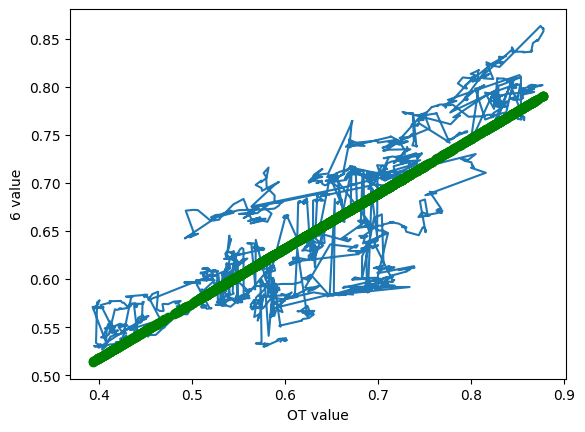

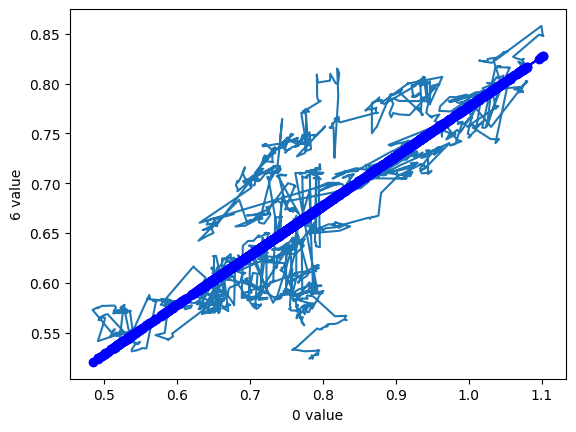

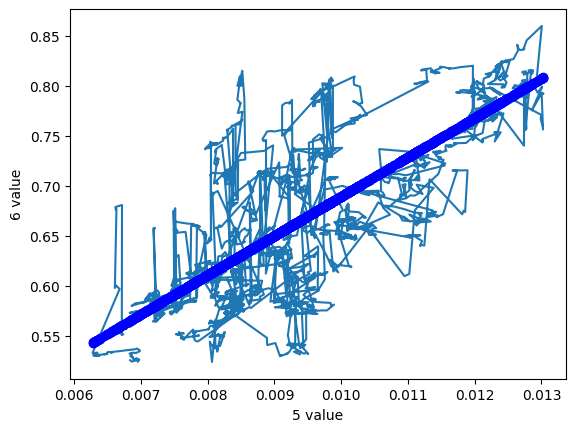

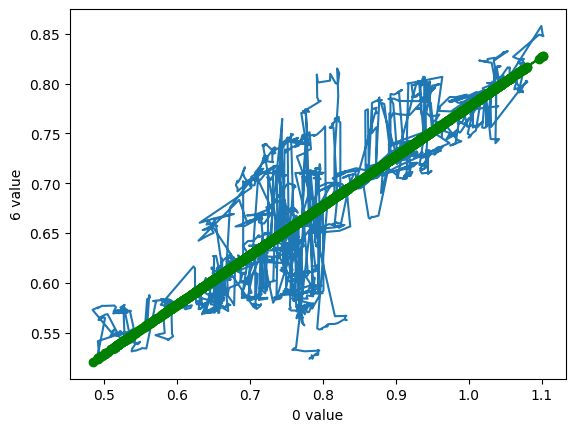

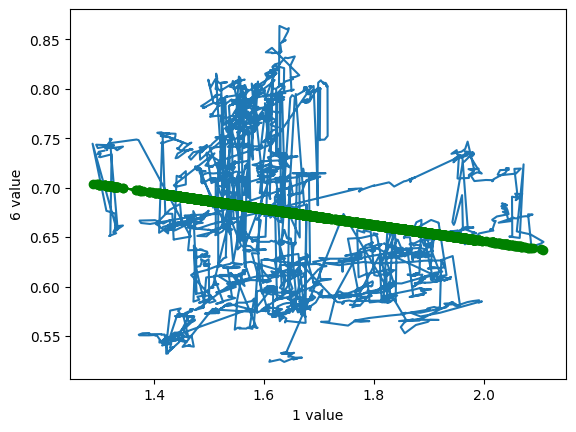

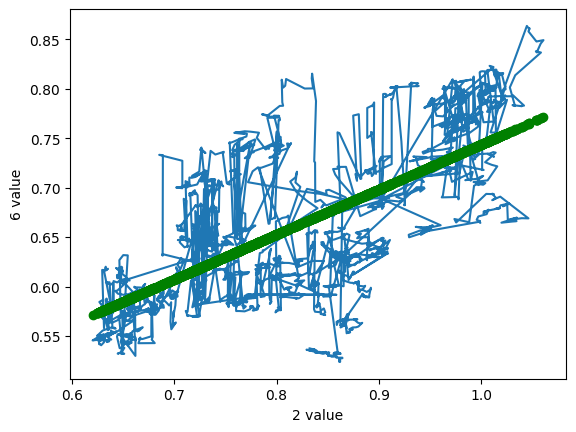

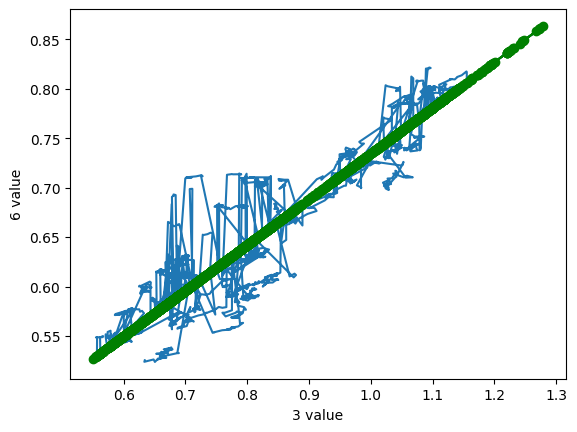

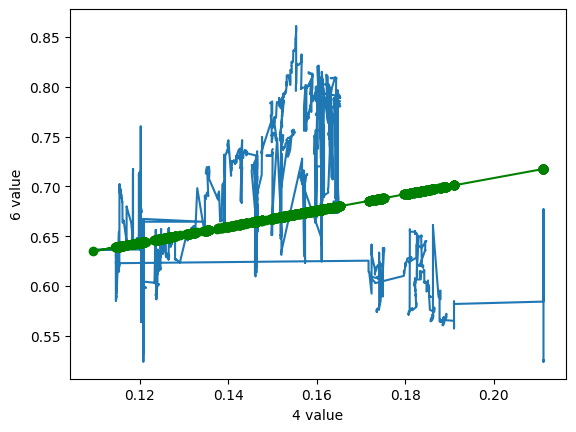

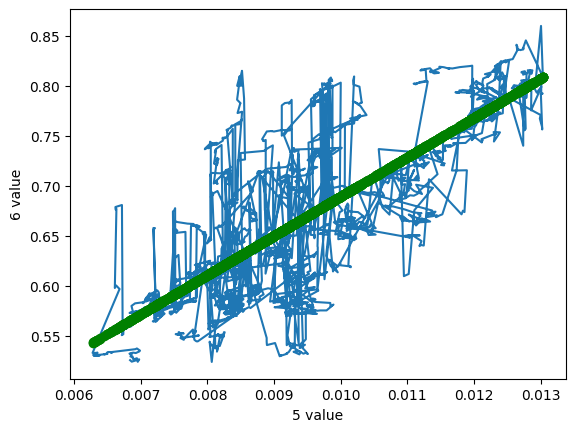

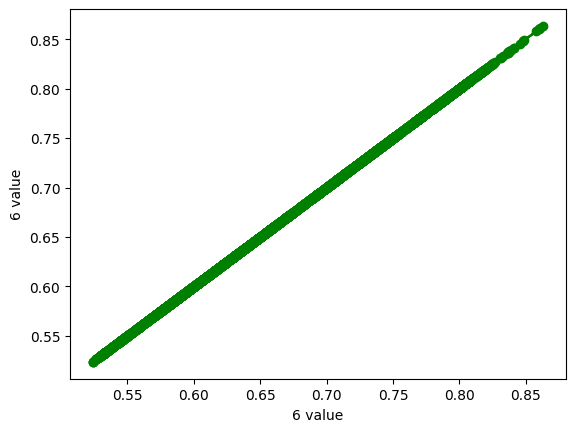

[0.595, 0.597, 0.602, 0.5983, 0.6003, 0.5998, 0.601, 0.5936, 0.5915, 0.593, 0.5805, 0.5808, 0.5767, 0.5783, 0.579, 0.5778, 0.577, 0.579, 0.5782, 0.578, 0.5784, 0.5783, 0.5817, 0.5755, 0.5735, 0.5748, 0.5685, 0.5708, 0.5727, 0.5726, 0.5726, 0.5747, 0.5735, 0.5737, 0.5739, 0.5733, 0.5741, 0.5757, 0.5768, 0.5752, 0.5768, 0.5776, 0.5819, 0.5828, 0.5812, 0.5785, 0.5783, 0.5823, 0.5875, 0.586, 0.5852, 0.5873, 0.5872, 0.5883, 0.5903, 0.5902, 0.59, 0.5903, 0.5912, 0.5933, 0.5938, 0.5881, 0.5918, 0.5892, 0.5918, 0.5928, 0.5923, 0.595, 0.5937, 0.5942, 0.5918, 0.5894, 0.5888, 0.591, 0.5918, 0.594, 0.618, 0.6173, 0.619, 0.6197, 0.622, 0.6258, 0.6308, 0.6295, 0.628, 0.6313, 0.6303, 0.6132, 0.6153, 0.6165, 0.624, 0.6255, 0.6233, 0.6202, 0.6185, 0.6215, 0.624, 0.6275, 0.623, 0.613, 0.6105, 0.6125, 0.61, 0.6095, 0.6095, 0.6118, 0.6125, 0.6137, 0.6119, 0.6113, 0.61, 0.6092, 0.609, 0.61, 0.609, 0.6008, 0.6025, 0.6043, 0.6005, 0.6011, 0.596, 0.5985, 0.5913, 0.5872, 0.5997, 0.59, 0.586, 0.5855, 0.586, 0.5

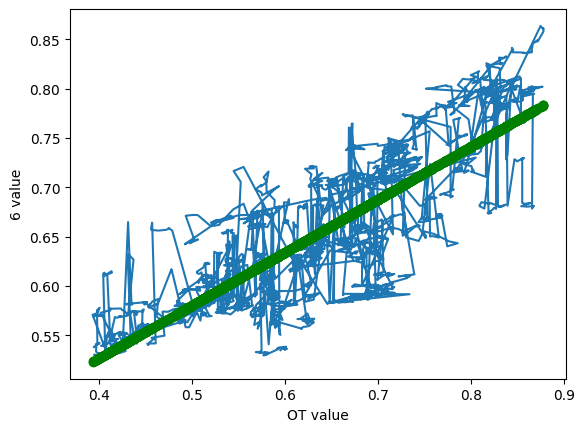

C:\Users\jerem\AppData\Local\Temp\ipykernel_19168\3400275882.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['date'] = pd.to_datetime(new_df['date'])
C:\Users\jerem\AppData\Local\Temp\ipykernel_19168\3400275882.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['6'] = new_df['6'].interpolate(method='nearest', order=2)


In [3]:

def CompleteValue(df,valueForfill,valueFill):
    df_temp=[]
    df_6temp=[]
    liste_6=[]
    #valeur plus corélé c'est 0
    for i in range(len(df[valueFill])) :
        if not(pd.isna(df[valueForfill][i])) and not(pd.isna(df[valueFill][i])):
                    df_temp.append(df[valueForfill][i])
                    df_6temp.append(df[valueFill][i])
        
    model = LinearRegression()
    model.fit(np.array(df_temp).reshape(-1, 1), np.array(df_6temp).reshape(-1, 1))
    plt.plot(df_temp,df_6temp)
    for i in range(len(df_temp)):
        liste_6.append(model.predict(np.array(df_temp[i]).reshape(-1, 1))[0])
    plt.plot(df_temp, liste_6, 'o-', label='Données réelles',color='b')
    plt.xlabel(f'{valueForfill} value')
    plt.ylabel(f'{valueFill} value')
    plt.show()
    for i in range(len(df[valueFill])-1):
        if pd.isna(df[valueFill][i]) and not(pd.isna(df[valueForfill][i])) :
            df.loc[i,valueFill]=model.predict(np.array(df[valueForfill][i]).reshape(-1, 1))[0]
    df["6"].isnull()


Compare(df,"3")
CompleteValue(df,"3","6")
Compare(df,"6")
CompleteValue(df,"0","6")
CompleteValue(df,"5","6")

Compare(df,"6")
    
new_df=df[["date","6"]]
new_df['date'] = pd.to_datetime(new_df['date'])
new_df.set_index('date', inplace=True)
#Puis on compléte le peu de valeurs manquantes avec la méthode interpolate de panda qui utilise les valeurs les plus proche pour completer les valeurs manquantes

new_df['6'] = new_df['6'].interpolate(method='nearest', order=2)
new_df.to_csv("data_clean.csv", index=True)



In [4]:
# Loading the ETTh1 dataset
df = pd.read_csv("data_clean.csv")
df['date'] = pd.to_datetime(df['date'])

df.set_index('date', inplace=True)

df

,6
date,
1990-01-01,0.525486
1990-01-02,0.523972
1990-01-03,0.526316
1990-01-04,0.523834
1990-01-05,0.527426
...,...
2010-06-28,0.730941
2010-06-29,0.734498
2010-06-30,0.733708


## Choosing our model for the time series forecasting


To predict the next 100 values of "OT", we need to choose a forecasting model.


Let's compare the mae of 4 models from darts.

In [5]:
!pip install darts

In [6]:
import torch
import pandas as pd

from darts import TimeSeries
from darts.models import TFTModel, NBEATSModel, TiDEModel
from darts.dataprocessing.transformers.scaler import Scaler
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from darts.metrics import mae, mse

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsforecast\core.py:26: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsforecast\utils.py:237: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "ds": pd.date_range(start="1949-01-01", periods=len(AirPassengers), freq="M"),


## Splitting data into train / test sets

In [7]:
series = TimeSeries.from_dataframe(df)
train, temp = series.split_after(0.8)
val, test = temp.split_after(0.9)

<Axes: xlabel='date'>

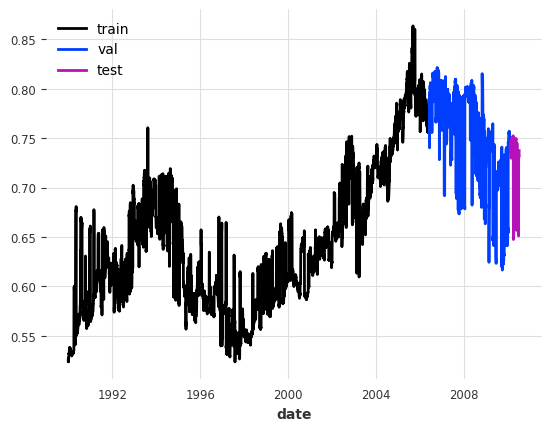

In [8]:
train.plot(label="train")
val.plot(label="val")
test.plot(label="test")

In [9]:
scaler = Scaler()  # default uses sklearn's MinMaxScaler
series_scaled = scaler.fit_transform(series)
train = scaler.fit_transform(train)
val = scaler.transform(val)
test = scaler.transform(test)

## Models Configuration

We will choose between 4 models : 
- TFTModel
- NBEATSModel
- TiDEModel
- TiDE+RinModel

In [10]:
optimizer_kwargs = {
    "lr": 1e-3,
}

# PyTorch Lightning Trainer arguments
pl_trainer_kwargs = {
    "gradient_clip_val": 1,
    "max_epochs": 5,
    "accelerator": "auto",
    "callbacks": [],
}

# learning rate scheduler
lr_scheduler_cls = torch.optim.lr_scheduler.ExponentialLR
lr_scheduler_kwargs = {
    "gamma": 0.999,
}

# early stopping
# this setting stops training once the the validation loss has not decreased by more than 1e-3 for 10 epochs
early_stopping_args = {
    "monitor": "val_loss",
    "patience": 2,
    "min_delta": 1e-3,
    "mode": "min",
}

#
common_model_args = {
    "input_chunk_length": 12,  # lookback window
    "output_chunk_length": 12,  # forecast/lookahead window
    "optimizer_kwargs": optimizer_kwargs,
    "pl_trainer_kwargs": pl_trainer_kwargs,
    "lr_scheduler_cls": lr_scheduler_cls,
    "lr_scheduler_kwargs": lr_scheduler_kwargs,
    "likelihood": None,  # use a likelihood for probabilistic forecasts
    "save_checkpoints": True,  # checkpoint to retrieve the best performing model state,
    "force_reset": True,
    "batch_size": 512,
    "random_state": 42,
}

In [11]:
# create the models
model_tft = TFTModel(
    **common_model_args, add_relative_index=True,model_name="tft"
)

model_nbeats = NBEATSModel(
    **common_model_args, model_name="nbeats"
)

model_tide = TiDEModel(
    **common_model_args, use_reversible_instance_norm=False, model_name="tide0"
)

model_tide_rin = TiDEModel(
    **common_model_args, use_reversible_instance_norm=True, model_name="tide1"
)

models = {
    "TFT": model_tft,
    "NBEATS": model_nbeats,
    "TiDE": model_tide,
    "TiDE+RIN": model_tide_rin,
}

In [12]:
# train the models and load the model from its best state/checkpoint
for name, model in models.items():

    # early stopping needs to get reset for each model
    pl_trainer_kwargs["callbacks"] = [
        EarlyStopping(
            **early_stopping_args,
        )
    ]

    model.fit(
        series=train,
        val_series=val,
        verbose=True,
    )
    # load from checkpoint returns a new model object, stored in the models dict
    models[name] = model.load_from_checkpoint(model_name=model.model_name, best=True)

Epoch 4: 100%|██████████| 12/12 [00:01<00:00,  9.44it/s, train_loss=0.00317, val_loss=0.0121]


## Models Prediction

We will choose the model that predict with the lower mae

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 133.17it/s]


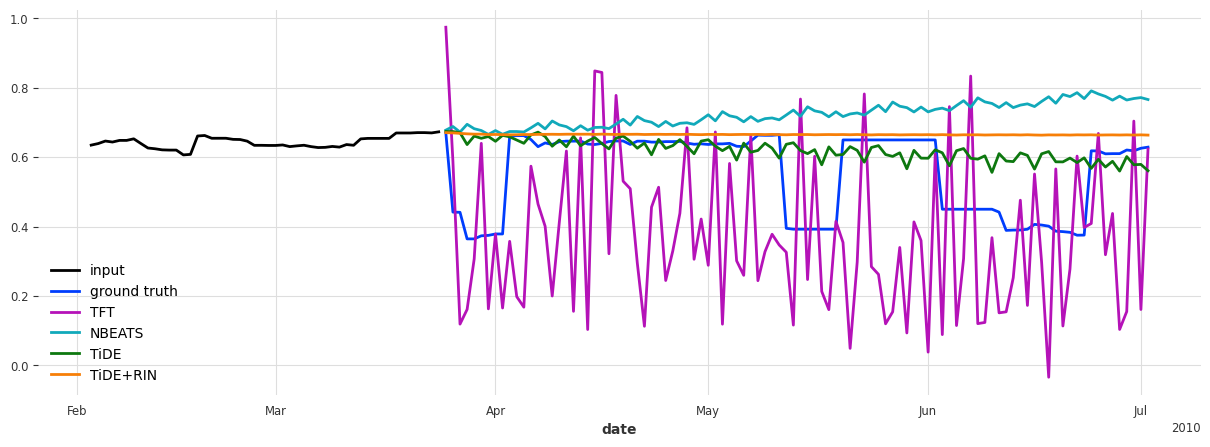

In [13]:
# predict the next `pred_steps` points after the end of `pred_input`
pred_steps = 100
pred_input = test[:-pred_steps]

fig, ax = plt.subplots(figsize=(15, 5))
pred_input.plot(label="input")
test[-pred_steps:].plot(label="ground truth", ax=ax)

result_accumulator = {}
# predict with each model and compute/store the metrics against the test sets
for model_name, model in models.items():
    pred_series = model.predict(n=pred_steps, series=pred_input)
    pred_series.plot(label=model_name, ax=ax)

    result_accumulator[model_name] = {
        "mae": mae(test, pred_series),
        "mse": mse(test, pred_series),
    }

## Models Result

<Axes: >

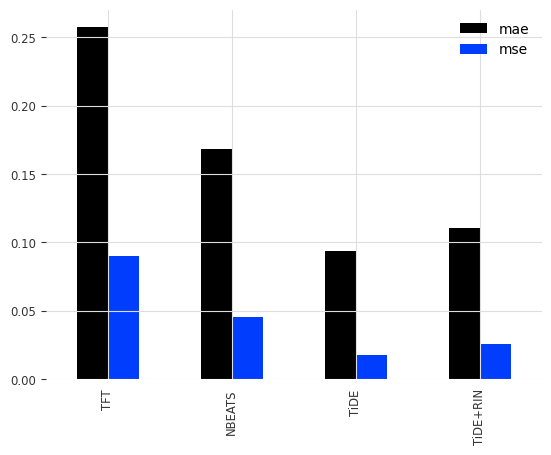

In [14]:
results_df = pd.DataFrame.from_dict(result_accumulator, orient="index")
results_df.plot.bar()

The model with the lower mae is TiDE+RIN.

We will use it to predict the 100 next values of "OT", but first let's change some hyperparameters to have better result.

### TiDE Final Model Configuration

Before working with TiDE+RIN, we used TiDE alone. The best mae we got was 0.6344992152. 

In [15]:
tide = TiDEModel(
    input_chunk_length=512, 
    output_chunk_length=100,
    num_encoder_layers=3,  # Augmentation du nombre de couches dans l'encodeur pour capturer des motifs plus complexes
    num_decoder_layers=3,  # Augmentation du nombre de couches dans le décodeur pour améliorer la précision de la prédiction
    decoder_output_dim=64,  # Augmentation de la dimension de sortie du décodeur pour une représentation plus riche
    hidden_size=1024,  # Augmentation de la taille de la couche cachée pour capturer des motifs plus complexes
    temporal_decoder_hidden=32,  # Augmentation de la taille de la couche cachée du décodeur temporel pour une meilleure représentation temporelle
    use_layer_norm=True,  # Utilisation de la normalisation de couche pour une stabilité accrue de l'entraînement
    dropout=0.3,  # Réduction du taux de dropout pour une régularisation moins agressive
    random_state=42  # Fixation de la graine aléatoire pour une reproductibilité des résultats
)

With the random_state=42, we always get 0.6344992152. It helped us find the best hyperparameters.

### TiDE Final Model Prediction

In [16]:
tide.fit(
    series=series_scaled,
    epochs=5,
    verbose=True,
)

Epoch 4: 100%|██████████| 215/215 [00:58<00:00,  3.65it/s, train_loss=0.00942]


TiDEModel(output_chunk_shift=0, num_encoder_layers=3, num_decoder_layers=3, decoder_output_dim=64, hidden_size=1024, temporal_width_past=4, temporal_width_future=4, temporal_decoder_hidden=32, use_layer_norm=True, dropout=0.3, use_static_covariates=True, input_chunk_length=512, output_chunk_length=100, random_state=42)

In [17]:
scaled_pred_tide = tide.predict(n=100)
pred_tide = scaler.inverse_transform(scaled_pred_tide)

ok = scaler.inverse_transform(pred_tide)
ok = ok.pd_dataframe()
ok = ok.reset_index(drop=True)
ok['Id'] = range(100)
ok
ok.to_csv('tide.csv', index=False)


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 52.47it/s]


pred_tide is our 100 predict values with TiDE.

## TiDE+RIN Final Model Configuration

In [18]:
models = {
    "TiDE+RIN": model_tide_rin,
}

optimizer_kwargs = {
    "lr": 1e-3,
}

# PyTorch Lightning Trainer arguments
pl_trainer_kwargs = {
    "gradient_clip_val": 1,
    "max_epochs": 5,
    "accelerator": "auto",
    "callbacks": [],
}

# learning rate scheduler
lr_scheduler_cls = torch.optim.lr_scheduler.ExponentialLR
lr_scheduler_kwargs = {
    "gamma": 0.999,
}

# early stopping
# this setting stops training once the the validation loss has not decreased by more than 1e-3 for 10 epochs
early_stopping_args = {
    "monitor": "val_loss",
    "patience": 2,
    "min_delta": 1e-3,
    "mode": "min",
}

#
common_model_args = {
    "input_chunk_length": 512,  # lookback window
    "output_chunk_length": 100,  # forecast/lookahead window
    "optimizer_kwargs": optimizer_kwargs,
    "pl_trainer_kwargs": pl_trainer_kwargs,
    "lr_scheduler_cls": lr_scheduler_cls,
    "lr_scheduler_kwargs": lr_scheduler_kwargs,
    "likelihood": None,  # use a likelihood for probabilistic forecasts
    "save_checkpoints": True,  # checkpoint to retrieve the best performing model state,
    "force_reset": True,
    "hidden_size": 512,
    "num_encoder_layers": 2,
    "num_decoder_layers": 2,
    "decoder_output_dim": 32,
    "temporal_decoder_hidden": 16,
    "dropout": 0.5,
}

In [19]:
# train the models and load the model from its best state/checkpoint
for name, model in models.items():

    # early stopping needs to get reset for each model
    pl_trainer_kwargs["callbacks"] = [
        EarlyStopping(
            **early_stopping_args,
        )
    ]

    model.fit(
        series=train,
        val_series=val,
        verbose=True,
    )
    # load from checkpoint returns a new model object, stored in the models dict
    models[name] = model.load_from_checkpoint(model_name=model.model_name, best=True)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Epoch 4: 100%|██████████| 12/12 [00:01<00:00,  9.40it/s, train_loss=0.00407, val_loss=0.012] 


In [20]:
# predict the next `pred_steps` points after the end of `pred_input`
pred_steps = 100
pred_input = series_scaled

# predict with each model and compute/store the metrics against the test sets
for model_name, model in models.items():
    pred_series = model.predict(n=pred_steps, series=pred_input)

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 133.05it/s]


## Final Result

In [21]:
result = scaler.inverse_transform(pred_series)
result = result.pd_dataframe()
result = result.reset_index(drop=True)
result['Id'] = range(100)
result

component,6,Id
0,0.727897,0
1,0.720855,1
2,0.719306,2
3,0.718001,3
4,0.711068,4
...,...,...
95,0.710396,95
96,0.710540,96
97,0.710395,97
98,0.710547,98


In [22]:
result.to_csv('predictions.csv', index=False)

We save our result in a csv that we submit to the competition


Best result so far : mae = 0.6177714877